# 03 π と e とEuler定数 γ

黒木玄

2018-04-18

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/03%20pi%2C%20e%2C%20and%20Euler's%20γ.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#準備:-曲線の長さ" data-toc-modified-id="準備:-曲線の長さ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>準備: 曲線の長さ</a></span></li><li><span><a href="#円周率" data-toc-modified-id="円周率-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>円周率</a></span><ul class="toc-item"><li><span><a href="#円周率の定義1" data-toc-modified-id="円周率の定義1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>円周率の定義1</a></span></li><li><span><a href="#正弦函数の微積分" data-toc-modified-id="正弦函数の微積分-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>正弦函数の微積分</a></span></li><li><span><a href="#円周率の定義2" data-toc-modified-id="円周率の定義2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>円周率の定義2</a></span></li><li><span><a href="#正接函数の微積分" data-toc-modified-id="正接函数の微積分-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>正接函数の微積分</a></span></li></ul></li><li><span><a href="#Napier数" data-toc-modified-id="Napier数-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Napier数</a></span><ul class="toc-item"><li><span><a href="#対数函数と指数函数" data-toc-modified-id="対数函数と指数函数-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>対数函数と指数函数</a></span></li><li><span><a href="#Napier数の定義" data-toc-modified-id="Napier数の定義-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Napier数の定義</a></span></li></ul></li><li><span><a href="#Euler定数" data-toc-modified-id="Euler定数-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Euler定数</a></span><ul class="toc-item"><li><span><a href="#Euler定数の定義" data-toc-modified-id="Euler定数の定義-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Euler定数の定義</a></span></li><li><span><a href="#条件収束交代級数への応用" data-toc-modified-id="条件収束交代級数への応用-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>条件収束交代級数への応用</a></span></li><li><span><a href="#Euler定数がガンマ函数の無限積表示に出て来ること" data-toc-modified-id="Euler定数がガンマ函数の無限積表示に出て来ること-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Euler定数がガンマ函数の無限積表示に出て来ること</a></span></li><li><span><a href="#Euler定数が高次元単体上の一様分布に関連して自然に出て来ること" data-toc-modified-id="Euler定数が高次元単体上の一様分布に関連して自然に出て来ること-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Euler定数が高次元単体上の一様分布に関連して自然に出て来ること</a></span></li><li><span><a href="#ζ(s)---1/(s-1)-の-s→0-での極限がEuler定数に等しいこと" data-toc-modified-id="ζ(s)---1/(s-1)-の-s→0-での極限がEuler定数に等しいこと-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>ζ(s) - 1/(s-1) の s→0 での極限がEuler定数に等しいこと</a></span></li></ul></li></ul></div>

In [1]:
using Plots; gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

using SymPy
using SpecialFunctions

## 準備: 曲線の長さ

**高校数学IIIの復習:** 曲線の長さは速さの時間積分で定義される. すなわち, 曲線 $(x(t),y(t))$, $a<t<b$ の長さ $\ell$ は定積分

$$
\ell = \int_a^b \sqrt{x'(t)^2 + y'(t)^2}\;dt
$$

で定義される. 被積分函数は点の運動の速さを意味する.

## 円周率

### 円周率の定義1

円周率 $\pi$ の定義は単位半円周の長さである. 単位半円周 $C$ は

$$
C = \{\,(x,y)\in\R^2 \mid x^2+y^2 = 1,\; x > 0\,\}
$$

と定義される. これは

$$
x(t) = \sqrt{1-t^2}, \quad y(t) = t
$$

によって

$$
C = \{\,(x(t),y(t))\mid 1<t<1 \,\}
$$

と表わされ, ちょっとした計算で

$$
\sqrt{x'(t)^2+y'(t)^2} = \frac{1}{\sqrt{1-t^2}}
$$

となることがわかる(自分で計算してみよ). ゆえに, 円周率は

$$
\pi = \int_{-1}^1 \frac{dt}{\sqrt{1-t^2}}
$$

と表わされる.  これを円周率の定義だと思ってもよい. 

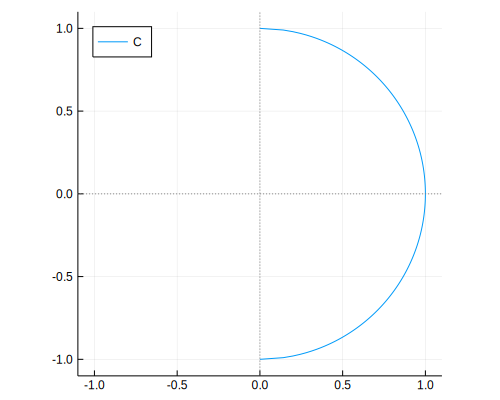

In [2]:
xx(t) = sqrt(1-t^2)
yy(t) = t
t = -1:0.01:1
plot(size=(500, 400), aspect_ratio=1, xlim=(-1.1,1.1), ylim=(-1.1,1.1))
plot!(xx.(t), yy.(t), label="C", legend=:topleft)
hline!([0], color="gray", ls=:dot, label="")
vline!([0], color="gray", ls=:dot, label="")

In [3]:
t = symbols("t", real=true)
x = sqrt(1-t^2)
y = t
simplify(diff(x,t)^2+diff(y,t)^2)

 -1   
------
 2    
t  - 1

In [4]:
integrate(1/sqrt(1-t^2), (t,-1,1))

pi

### 正弦函数の微積分

前節の計算より, $-1\leqq y\leqq 1$ に対して, 

$$
F(y) = \int_0^y\frac{dt}{\sqrt{1-t^2}}
$$

は $C$ 上の点 $(1,0)$ から $(\sqrt{1-y^2}, y)$ までの弧の長さの $\pm1$ 倍になる. 符号は $y>0$ なら $+$ になり, $y<0$ なら $-$ になる. すなわち, $\theta(y)$ は弧度法の意味での角度である.  単位円上の $y$ 座標を角度 $\theta$ の函数とみなしたものを $y = \sin\theta$ と定義するのであった. これは, $y = \sin\theta$ は $\theta=F(y)$ の逆函数であることを意味する.  $F(y)$ は $\arcsin y$ と書かれることが多い.

$\ds \frac{d\theta}{dy} = F'(y)=\frac{1}{\sqrt{1-y^2}}$ なので, その逆函数の導函数は

$$
\frac{d\sin\theta}{d\theta} = \frac{dy}{d\theta} = \sqrt{1-y^2} = \sqrt{1-\sin^2\theta}.
$$

これで $\sin\theta$ の導函数の計算の仕方もわかった.

以上の筋道に従えば, 高校数学IIIまでの範囲内で, 三角函数の微分積分学が適切に展開可能なことがわかる.

### 円周率の定義2

傾き $t$ の直線 $y=tx$ と単位半円周 $C$ の交点を $(X,Y)=(X(t), Y(t))$ と書くと,

$$
X=X(t) = \frac{1}{\sqrt{1+t^2}}, \quad Y=Y(t)=\frac{t}{\sqrt{1+t^2}}.
$$

このとき, 

$$
\sqrt{X'(t)^2+Y'(t)^2} = \frac{1}{1+t^2}
$$

となる(自分で工夫して楽な計算の仕方を見付けるように努力してみよ). ゆえに円周率は

$$
\pi = \int_{-\infty}^\infty \frac{dt}{1+t^2}
$$

と表わされる. これを円周率の定義だと思ってもよい.

**問題:** 積分 $\ds \int_{-\infty}^\infty \frac{dt}{1+t^2}$ で $\ds t = \frac{s}{\sqrt{1-s^2}}$ と置換すると,

$$
\int_{-\infty}^\infty \frac{dt}{1+t^2} = \int_{-1}^1 \frac{ds}{\sqrt{1-s^2}}
$$

が得られることを確認せよ. $\QED$

**注意:** $X=1/\sqrt{1+t^2}$, $Y=t/\sqrt{1+t^2}$ のとき, $X^2+Y^2=1$ より $X=\sqrt{1-Y^2}$ となるので, $t=Y/X=Y/\sqrt{1-Y^2}$.  さらに $Y=s$ とおけば上の問題の置換の式が得られる. $\QED$.

In [5]:
t = symbols("t", real=true)
X = 1/sqrt(1+t^2)
Y = t*X
simplify(sqrt(diff(X,t)^2+diff(Y,t)^2))

  1   
------
 2    
t  + 1

In [6]:
s = symbols("s")
t = s/sqrt(1-s^2)
simplify(diff(t,s)/(1+t^2))

      1      
-------------
   __________
  /    2     
\/  - s  + 1 

### 正接函数の微積分

前節の計算より, 

$$
\theta = G(a) = \int_0^a \frac{dt}{1+t^2}
$$

は単位半円周上の点 $(1,0)$ から傾き $a$ の直線 $y=ax$ と単位半円周 $C$ の交点までの弧の長さの $\pm1$ 倍になり, 符号 $a$ の符号に等しくなる. すなわち, 弧度法の意味での角度に等しい.

正接函数の定義は傾きを角度の函数とみたものであった. これは $a=\tan\theta$ が $\theta=G(a)$ の逆函数になっていることを意味している. $G(a)$ は $\arctan a$ と書かれることが多い.

$\ds\frac{d\theta}{da} = G'(a) = \frac{1}{1+a^2}$ なので,  $\ds\frac{d\tan\theta}{d\theta} = \frac{da}{d\theta} = 1+a^2 = 1+\tan^2\theta$.

以下の公式もよく使われる:

$$
\int_0^1 \frac{dt}{1+t^2} = \frac{\pi}{4}, \qquad
\int_0^\infty \frac{dt}{1+t^2} = \frac{\pi}{2}.
$$

In [7]:
t = symbols("t", real=true)
integrate(1/(1+t^2), (t,0,1)), integrate(1/(1+t^2), (t,0,oo))

(pi/4, pi/2)

## Napier数

### 対数函数と指数函数

このノートでは $x>0$ の(自然)対数函数 $y = \log x$ を

$$
y = \log x = \int_1^x \frac{dt}{t}
$$

で定義し, これの逆函数で指数函数 $x = \exp y$ を定義しておく. 

このとき, $\log 1 = 0$, $\exp 0 = 1$ となる.

さらに, $\ds\frac{dy}{dx}=\frac{d\log x}{dx} = \frac{1}{x}$ が成立し, その逆函数については $\ds\frac{dx}{dy} = \frac{d\exp y}{dy} = x = \exp y$.

これらの条件によって $\log x$ と $\exp y$ は一意的に定まることを示せるが, ここではその証明には触れない.

**問題:** 上の対数函数の定義だけを用いて $\log(x_1x_2)=\log x_1 + \log x_2$ ($x_1,x_2>0$) となることを示せ.

**証明:** 

$$
\log(x_1 x_2) = \int_1^{x_1x_2}\frac{dt}{t} =
\int_1^{x_1} \frac{dt}{t} + \int_{x_1}^{x_1x_2}\frac{dt}{t}.
$$

2つ目の項の積分変数を $t=x_1 s$ で置換すると, 

$$
\int_{x_1}^{x_1x_2}\frac{dt}{t} = \int_1^{x_2} \frac{x_1\,ds}{x_1 s} = \int_1^{x_2} \frac{ds}{s}.
$$

$s$ を改めて $t$ とおけば欲しい結果が得られる. $\QED$

**問題:** 上の問題の結果を用いて $\exp(y_1+y_2) = \exp(y_1)\exp(y_2)$ となることを示せ.

**証明:** $x_i = \exp y_i$ とおくと, $y_i=\log x_i$ であり, 上の問題の結果より, $y_1+y_2=\log(x_1 x_2)$ なので

$$
\exp(y_1+y_2) = \exp\log(x_1 x_2) = x_1 x_2 = \exp(y_1)\exp(y_2).
\qquad\QED
$$

$a>0$ に対して, $a^y$ を

$$
a^y = \exp(y\log a)
$$

によって定義する.  このとき, 整数 $n$ について

$$
a^1 = \exp(\log a)) = a, \qquad
a^n = \exp(n\log a)) = (\text{$n$ 個の $\exp(\log a))$ の積}) = (\text{$n$ 個の $a$ の積}).
$$

後者で上の問題の結果を使った.  これより, 整数の $n$ について, 上の定義に基いた $a^n$ と $n$ 個の $a$ の積が一致することがわかった. 上のように定義しても混乱は生じない.

### Napier数の定義

このノートでは Napier数 $e$ を

$$
e = \exp(1)
$$

によって定義する. すなわち $e$ は

$$
\int_1^e \frac{dt}{t} = 1
$$

という条件で定義されているものとする.

**定理:**
$$
\lim_{n\to\infty}\left(1+\frac{y}{n}\right)^n = \exp(y).
$$

**証明:**

$$
\left(1+\frac{y}{n}\right)^n = \exp\left[n\log\left(1+\frac{y}{n}\right)\right]
$$

である. $d(\log x)/dx = 1/x$ の $x=1$ の場合より,  $h\to 0$ のとき, 

$$
\frac{\log(1+h)}{h} = \frac{\log(1+h)-\log(1)}{h} \to 1.
$$

これを $h=y/n$, $n\to\infty$ の場合に適用すると, 

$$
\frac{\log(1+y/n)}{1/n} = y \frac{\log(1+y/n)}{y/n} \to y.
$$

ゆえに, $\exp$ の連続性を用いると, $n\to\infty$ のとき,

$$
\left(1+\frac{y}{n}\right)^n = \exp\left[n\log\left(1+\frac{y}{n}\right)\right]\to \exp(y).
\qquad\QED
$$

上の定理の $y=1$ の特別な場合として次が得られる.

**系:**
$$
\lim_{n\to\infty}\left(1+\frac{1}{n}\right)^n = e.
\qquad\QED
$$

以上によって, 対数函数と指数函数とNapier数 $e$ の理論が微分積分学を用いてすべて再構成された.

## Euler定数

以上によって, 数学における基本的な定数 $\pi$ と $e$ の定義が明瞭になった.

しかし, それだけで終わってしまうと, 高校の数学で習うことを単に再構成したに過ぎなくなってしまう. 

そこでこのノートではその次に知っておくべきだと思われるEuler定数 $\gamma$ について説明しよう.

Euler定数とその歴史については次の文献が詳しい:

* https://arxiv.org/abs/1303.1856

### Euler定数の定義

数列 $a_n, b_n$ を次のように定める:

$$
\begin{aligned}
&
a_n = \frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} - \log(n+1)
\\ &
b_n = \frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} - \log n.
\end{aligned}
$$

$y=1/x$ は狭義単調減少函数なので

$$
\begin{aligned}
&
\log(n+1) - \log n = \int_n^{n+1}\frac{dx}{x} < 
\frac{1}{n} < 
\int_{n-1}^n \frac{dx}{x} = \log n - \log(n-1),
\\ &
\log(n+1)=\int_1^{n+1} \frac{dx}{x} < 
\frac{1}{1}+\frac{1}{2}+\cdots+\frac{1}{n} 
\end{aligned}
$$

となる(図を描いて確認せよ).  後者より, 

$$
0 < a_n < b_n
$$

が成立していることがわかり, 前者より, 

$$
\begin{aligned}
&
a_n - a_{n-1} = \frac{1}{n} + \log n - \log(n+1) > 0, 
\\ &
b_n - b_{n-1} = \frac{1}{n} + \log(n-1) - \log n < 0.
\end{aligned}
$$

となり, $a_n$ は単調増加し, $b_n$ は単調減少することがわかる. (図を描けば, $a_n$ が単調増加し, $b_n$ が単調減少することは見た目的に明らかになる.)

したがって, $a_n$ も $b_n$ も収束することがわかる.


さらに, $0<\log(n+1)-\log n<1/n$ より $a_n$ と $b_n$ の収束先が同じであることもわかる.

それらの収束先を $\gamma$ と書き, **Euler定数**と呼ぶ.

$$
\gamma = 
\lim_{n\to\infty}\left(\frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} - \log(n+1)\right) = 
\lim_{n\to\infty}\left(\frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} - \log n\right).
$$

この定義は次のように書き換えられる:

$$
\frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} = \log n + \gamma + o(1).
$$

ここで $o(1)$ は $n\to\infty$ で $0$ に収束する項を表す.

**考え方:** 解析学では

    (調べたい量) = (相対的にわかりやすい量) + (誤差)

の形式で考える. Euler定数の定義は, 調べたいもの

$$
\frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n}
$$

を相対的にわかりやすい量

$$
\log n + \gamma
$$

プラス誤差の形式で認識することであるとみなせる.  $n$ が大きなとき, 第1項の $\log n$ と比較して第2項の定数項 $\gamma$ は小さいとみなせ, 第2項 $\gamma$ と比較して誤差項 $o(1)$ は小さいとみなせる. $1/1+1/2+\cdots+1/n$ を $\log n$ で大雑把に近似するより, $\log n + \gamma$ で近似する方がより精密な近似になる. 

このように新たに項を付け加えることによって近似の精度を逐次的に高めて行くことは, 解析学における典型的なパターンであり, あらゆる場所で出会うことになる. $\QED$

**注意:** digamma函数 $\psi(s)$ ($s>0$) を

$$
\psi(s) =
-\lim_{n\to\infty}\left[\frac{1}{s}+\frac{1}{s+1} + \cdots + \frac{1}{s+n} - \log n\right]
$$

と定めることができる. これはガンマ函数が

$$
\Gamma(s)=\lim_{n\to\infty}\frac{n^s n!}{s(s+1)\cdots(s+n)}
$$

と書けることを使えば $\psi(s)=d\log\Gamma(s)/ds$ とも表わされる. ガンマ函数に関するこの公式については

* <a href="https://genkuroki.github.io/documents/20160501StirlingFormula.pdf">ガンマ分布の中心極限定理とStirlingの公式</a>

の第8.2節を参照せよ. Euler定数の定義より $\psi(1)=-\gamma$ であることがわかり, digamma函数の定義より $\psi(s+1)=1/s+\psi(s)$ であることがわかるので, 帰納的に非負の整数 $n$ について

$$
\psi(n+1) = \frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} - \gamma
$$

であることがわかる. この公式はdigamma函数 $\psi(s+1)$ は調和級数からEuler定数を引いたものの連続的な補間になっていることを意味している.  したがって, $\psi(s+1)$ の $s\to\infty$ での漸近挙動がよくわかれば, 調和級数の漸近挙動もよくわかることになる. 

ガンマ函数については次のStirlingの近似公式がよく知られている: $s\to\infty$ において

$$
\log\Gamma(s+1) = s\log s - s + \frac{1}{2}\log s + \log\sqrt{2\pi} + \frac{1}{12s} + O\left(\frac{1}{s^2}\right).
$$

これを $s$ で微分することによって, 

$$
\psi(s+1) = \log s + \frac{1}{2s} - \frac{1}{12s^2} + O\left(\frac{1}{s^3}\right) \qquad (s\to\infty).
$$

以上をまとめると次が得られる:

$$
\frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} =
\log n + \gamma + \frac{1}{2n} - \frac{1}{12n^2} + O\left(\frac{1}{n^3}\right) \qquad (s\to\infty).
$$

このように調和級数 $\ds\frac{1}{1}+\frac{1}{2}+\cdots+\frac{1}{n}$ の $n\to\infty$ における漸近挙動の詳細はガンマ函数に関するStirlingの公式の対数微分によって得られる. $\QED$

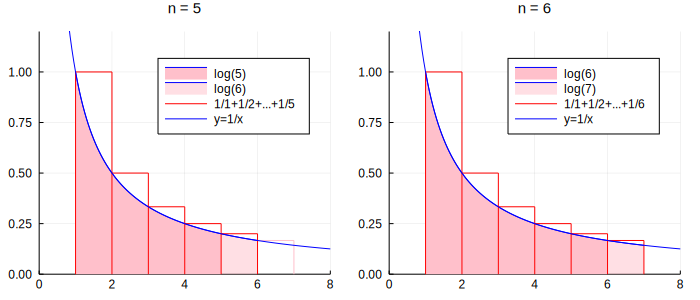

In [8]:
function plot_eulergamma(N, n)
    f(x) = 1/x
    p = plot(xlim=(0,N+2), ylim=(0, 1.2))
    x = 1.0:0.05:n
    plot!(p, x, f.(x), color=:blue, label="log($n)", fill=(0, 1.0, :pink))
    x = n:0.05:n+1
    plot!(p, x, f.(x), color=:blue, label="log($(n+1))", fill=(0, 0.5, :pink))
    plot!(p, [1,1], [0,1], color=:red, label="1/1+1/2+...+1/$n")
    for k in 1:N
        x = k:0.05:k+1
        g(x) = 1/k
        c = ifelse(k > n, :pink, :red)
        plot!(p, x, g.(x), color=c, label="")
        plot!(p, [k+1,k+1], [0,1/k], color=c, label="")
    end
    x = 0.1:0.05:N+2
    plot!(p, x, f.(x), color=:blue, label="y=1/x")
    plot!(title="n = $n", titlefontsize=10)
    p
end

N = 6
p1 = plot_eulergamma(N, N-1)
p2 = plot_eulergamma(N, N)
plot(p1, p2, size=(700, 300))

In [9]:
a(n) = sum(k->1/k, 1:n) - log(n+1)
b(n) = sum(k->1/k, 1:n) - log(n)
[(n, a(n), b(n)) for n in [1:9; 10.^(1:7)]]

16-element Array{Tuple{Int64,Float64,Float64},1}:
 (1, 0.306853, 1.0)            
 (2, 0.401388, 0.806853)       
 (3, 0.447039, 0.734721)       
 (4, 0.473895, 0.697039)       
 (5, 0.491574, 0.673895)       
 (6, 0.50409, 0.658241)        
 (7, 0.513416, 0.646947)       
 (8, 0.520633, 0.638416)       
 (9, 0.526383, 0.631744)       
 (10, 0.531073, 0.626383)      
 (100, 0.572257, 0.582207)     
 (1000, 0.576716, 0.577716)    
 (10000, 0.577166, 0.577266)   
 (100000, 0.577211, 0.577221)  
 (1000000, 0.577215, 0.577216) 
 (10000000, 0.577216, 0.577216)

In [10]:
eulergamma

γ = 0.5772156649015...

### 条件収束交代級数への応用

次の2つの数列を考える:

$$
A_n = \frac{1}{1} + \frac{1}{3} + \cdots + \frac{1}{2n-1}, \quad
B_n = \frac{1}{2} + \frac{1}{4} + \cdots + \frac{1}{2n}.
$$

このとき

$$
A_n + B_n = \sum_{k=1}^{2n}\frac{1}{k} = \log(2n) + \gamma + o(1), \quad
2B_n = \sum_{k=1}^n \frac{1}{k} = \log n + \gamma + o(1).
$$

ここで $o(1)$ は $n\to\infty$ で $0$ に収束する項を意味する. ゆえに, 

$$
A_n = \log 2 + \frac{1}{2}\log n + \frac{\gamma}{2} + o(1), \quad
B_n = \frac{1}{2}\log n + \frac{\gamma}{2} + o(1).
$$

これより, $n\to\infty$ で

$$
A_n-B_n \to \log 2.
$$

すなわち,

$$
\frac{1}{1} - \frac{1}{2} + \frac{1}{3} - \frac{1}{4} + \cdots = \log 2.
$$

より一般に正の整数 $p,q$ について

$$
A_{pn} = \log 2 + \frac{1}{2}(\log p+\log n) + \frac{\gamma}{2} + o(1), \quad
B_n = \frac{1}{2}(\log q + \log n) + \frac{\gamma}{2} + o(1)
$$

なので, $n\to\infty$ のとき

$$
A_{pn}-B_{qn} \to \log 2 + \frac{1}{2}\log\frac{p}{q}. 
$$

**例:** $p=2$, $q=1$ のとき

$$
\frac{1}{1}+\frac{1}{3}-\frac{1}{2} +
\frac{1}{5}+\frac{1}{7}-\frac{1}{4} +
\cdots = \frac{3}{2}\log 2.
$$

$p=1$, $q=2$ のとき

$$
\frac{1}{1}-\frac{1}{2}-\frac{1}{4} +
\frac{1}{3}-\frac{1}{6}-\frac{1}{8} +
\cdots = \frac{1}{2}\log 2.
\qquad \QED
$$

**考え方:** 以上のような計算が可能になったのは, 

$$
\frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n}
$$

が大雑把に $\log n$ で近似できることだけではなく, より精密に

$$
\frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} = \log n + \gamma + o(1)
$$

の形で漸近挙動がわかっているからである.

In [11]:
A(n) = sum(k->1/(2k-1), 1:n)
B(n) = sum(k->1/(2k), 1:n)

n = 10^7
@show S = A(2n) - B(n)
@show T = 3/2*log(2)
@show S - T;

S = A(2n) - B(n) = 1.039720745839908
T = (3 / 2) * log(2) = 1.0397207708399179
S - T = -2.5000009840070447e-8


In [12]:
sum(k->1/(4k-3)+1/(4k-1)-1/(2k), 1:10^7) - T

-2.5000000736241645e-8

### Euler定数がガンマ函数の無限積表示に出て来ること

$s>0$ のとき, ガンマ函数 $\Gamma(s)$ が

$$
\Gamma(s) = \int_0^\infty e^{-x} x^{s-1}\,dx
$$

によって定義され, digamma函数 $\psi(s)$ が

$$
\psi(s) = \frac{d}{ds}\log\Gamma(s) = \frac{\Gamma'(s)}{\Gamma(s)} =
\frac{1}{\Gamma(s)}\int_0^\infty e^{-x} x^{s-1}\log x\,dx
$$

によって定義される. 

ガンマ函数について次が成立してることが知られている(Weierstrassの公式):

$$
\frac{1}{\Gamma(s)} = 
e^{\gamma s} s \prod_{n=1}^\infty
\left[\left(1+\frac{s}{n}\right)e^{-s/n}\right].
$$

この公式の証明については

* <a href="https://genkuroki.github.io/documents/20160501StirlingFormula.pdf">ガンマ分布の中心極限定理とStirlingの公式</a>

の第8.2節を参照せよ.

Weierstrassの公式より

$$
-\psi(s) = \gamma + \frac{1}{s} - \sum_{n=1}^\infty\left[\frac{1}{n}-\frac{1}{n+s}\right].
$$

特に

$$
-\psi(1) = -\int_0^\infty e^{-x}\log x\,dx = \gamma = 0.5772156649015\cdots.
$$

Euler定数 $\gamma$ は次の積分表示を持つことも示せる:

$$
\gamma = \int_0^\infty\left(\frac{e^{-t}}{1-e^{-t}}-\frac{e^{-t}}{t}\right)\,dt.
$$

この公式の証明については上の文献の第8.7節を参照.

In [13]:
-digamma(big(1))

5.772156649015328606065120900824024310421593359399235988057672348848677267776685e-01

### Euler定数が高次元単体上の一様分布に関連して自然に出て来ること

$r>0$ に対して, $n-1$ 次元単体 $\Delta^{n-1}(r)$ が

$$
\Delta^{n-1}(r) = \{\,(x_1,\ldots,x_n)\in\R_{\geqq 0}^n \mid x_1+\cdots+x_n = r\,\}
$$

と定義される. ここで $\R_{\geqq 0}$ は非負の実数全体の集合を表す. 例えば, $n=3$ のとき

$$
\Delta^2(r) = \{\, (x,y,z)\in\R^3\mid x,y,z\geqq 0,\; x+y+z=r\,\}.
$$

は点 $(r,0,0)$, $(0,r,0)$, $(0,0,r)$ を頂点とする正三角形になる.

$\Delta^{n-1}(n)$ 上の一様分布(例えば $n=3$ の場合には正三角形上に一様に分布する確率分布)を考える. 

そのとき, $\Delta^{n-1}(n)$ の点の第 $i$ 座標 $x_i$ の分布(例えば $x_1$ の分布)は $n\to\infty$ のとき確率密度函数が $\exp(-x)$ の指数分布に近付くことを証明できる. 

ゆえに, $n\to\infty$ で $\log x_i$ の期待値は $\int_0^\infty e^{-x}\log x\,dx = \psi(1) = -\gamma = -0.5772\cdots$ に近付く.

このような形でも自然にEuler定数 $\gamma$ が自然に出て来る.

このような現象は「統計力学」ではよく知られている. 詳しくは次のノートを参照せよ:

* <a href="https://genkuroki.github.io/documents/20160616KullbackLeibler.pdf"> Kullback-Leibler情報量とSanovの定理</a>

**問題:** 次のセルの `rand_Uniform_on_Simplex` 函数がどうして $\Delta^{n-1}(1)$ 上の一様分布に従う擬似乱数を発生させる函数になっているかを説明せよ. 

**ヒント:** $(x_1,\ldots,x_n)$ を $(x_1, x_1+x_2, \ldots, x_1+\cdots+x_{n-1})$ に対応させる写像を考えよ. その写像を通して, 単体 $\Delta^{n-1}(1)$ 上の一様分布と $n-1$ 次元立方体 $[0,1]^{n-1}$ 上の一様分布をどのように関係付けられるかについて考えよ.  $n-1$ 次元立方体はその成分の並び方の順序で分類することによって $(n-1)!$ 個の部分集合に分割される(境界の重なりは無視してよい). $\QED$

In [14]:
# r = 1 の場合の n-1 次元単体上の一様分布に従う擬似乱数を発生させる函数
function rand_Uniform_on_Simplex(n)
    Z = sort(rand(n-1))
    return vcat(Z, 1.0) - vcat(0.0, Z)
end

function rand_Uniform_on_Simplex(n, N)
    X = zeros(n, N)
    for j in 1:N
        X[:,j] = rand_Uniform_on_Simplex(n)
    end
    return X
end

# x_1 の分布と log x_i 達の平均の分布をプロットする函数
function plot_Uniform_on_Simplex(n; N=10^4)
    X = n*rand_Uniform_on_Simplex(n, N)
    ElogX = vec(mean(log.(X), 1))

    p1 = plot(xlabel="x", xlim=(0, 7.5), title="n = $n")
    histogram!(p1, X[1,:], normed=true, alpha=0.5, label="x_1")
    plot!(p1, x->exp(-x), 0, 7.5, lw=2, label="exp(-x)")

    p2 = plot(xlabel="x", legend=:topleft, legendfontsize=7)
    xlims!(-eulergamma-0.3, -eulergamma+0.3)
    histogram!(p2, ElogX, normed=true, alpha=0.5, linealpha=0.1, label="mean of log x_i")
    vline!([-eulergamma], lw=2, label="x = $(round(Float64(-eulergamma),5))")

    plot(p1, p2, size=(700, 300), layout=grid(1,2,widths=[0.35, 0.65]))
end

plot_Uniform_on_Simplex (generic function with 1 method)

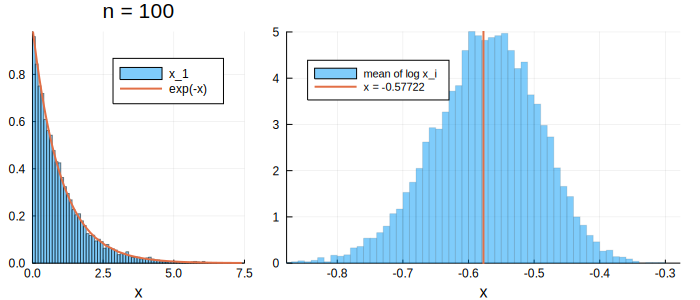

In [15]:
plot_Uniform_on_Simplex(100)

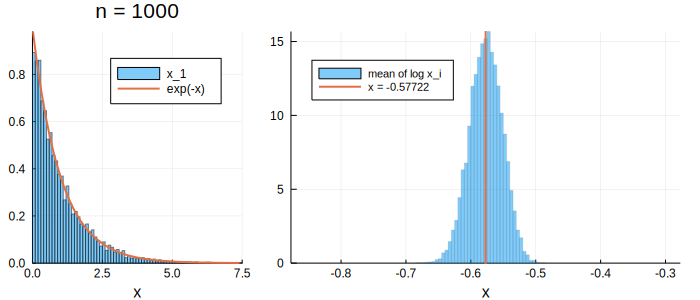

In [16]:
plot_Uniform_on_Simplex(1000)

 10.139388 seconds (1.04 M allocations: 5.992 GiB, 10.38% gc time)


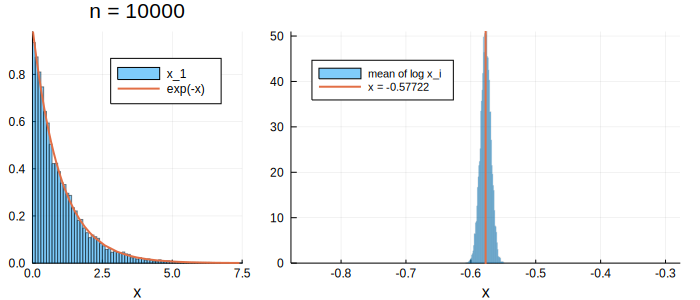

In [17]:
@time plot_Uniform_on_Simplex(10000)

**問題:** $n-1$ 次元単体 $\Delta^{n-1}(n)$ 上の一様分布に関する $x_1$ の分布が $n\to\infty$ で確率密度函数が $\exp(-x)$ の指数分布に近付くことを示せ. 直観的に明瞭な説明をしていれば必ずしも論理的に厳密な議論でなくてもよい.

**解答例:** 簡単のため, $\Delta^{n-1}(r)$ を $\R^{n-1}=\{(x_1,\ldots,x_{n-1})\}$ への射影の像を $D^{n-1}(r)$ と書くことにする:

$$
D^{n-1}(r) = \{\,(x_1,\ldots,x_{n-1})\in\R_{\geqq0}^{n-1}\mid x_1+\cdots+x_{n-1}\leqq r\,\}.
$$

$\Delta^{n-1}(r)$ 上の一様分布を $D^{n-1}(r)$ に射影して得られる分布は $D^{n-1}(r)$ 上の一様分布になる.

$D^{n-1}(r)$ の体積は $r^{n-1}/(n-1)!$ に等しい.
そして, $0\leqq a\leqq r$ のとき, $D^{n-1}(r)$ を $x_1\geqq a$ に制限して得られる部分集合は $D^{n-1}(r-a)$ に合同なのでその体積は $(r-a)^{n-1}/(n-1)!$ に等しい.  ゆえに, $x_1\geqq a$ となる確率は $P(x_1\geqq a)$ は

$$
P(x_1\geqq a) = \frac{(r-a)^{n-1}/(n-1)!}{r^{n-1}/(n-1)!} = \left(1-\frac{a}{r}\right)^{n-1}
$$

となるので, $r=n$ のとき, $n\to\infty$ で

$$
P(x_1\geqq a) = \left(1-\frac{a}{n}\right)^{n-1} \to \exp(-a).
$$

一方, 確率密度函数 $\exp(-x)$ において $x\geqq a$ となる確率は

$$
\int_a^\infty \exp(-x)\,dx = [-\exp(-x)]_a^\infty = \exp(-a).
$$

以上を比較することによって, $D^{n-1}(n)$ 上の一様分布に関する $x_1$ の分布は $n\to\infty$ で確率密度函数 $\exp(-x)$ の指数分布に近付くことがわかる. $\QED$

**注意:** 以上の議論において $D^{n-1}(r)$ に射影したことは本質的ではなく, $\Delta^{n-1}(r)$ の体積(面積)が $r^{n-1}$ に比例することだけを使っても同様の議論を遂行できる. $D^{n-1}(r)$ に射影するメリットは比例定数が $1/(n-1)!$ になることが易しく求まることに過ぎない. その比例定数は確率を求めるときに分子分母でキャンセルして消えるので議論の本質には何も影響しない. $\QED$

**問題:** $D^1(r)$, $D^2(r)$, $D^3(r)$ を図示し, それぞれの長さ, 面積, 体積がそれぞれ $r$, $r^2/2$, $r^3/6$ であることを確認せよ.  $\QED$

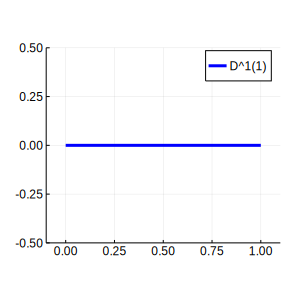

In [18]:
plot(size=(300,300), aspect_ratio=1)
plot!([0,1], [0,0], lw=3, color=:blue, label="D^1(1)")
plot!(xlims=(-0.1,1.1), ylims=(-0.5,0.5))

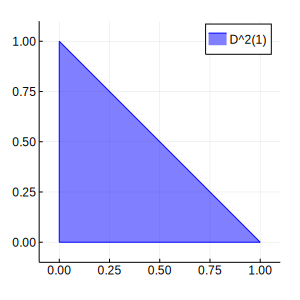

In [19]:
plot(size=(300,300), aspect_ratio=1)
plot!([0,1], [1,0], color=:blue, fill=(0, 0.5), label="D^2(1)")
plot!([0,0], [0,1], color=:blue, label="")
plot!([0,1], [0,0], color=:blue, label="")
plot!(xlims=(-0.1,1.1), ylims=(-0.1,1.1))

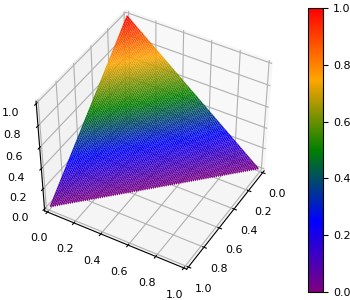

In [20]:
x = 0:0.01:1
y = 0:0.01:1
f(x,y) = ifelse(x+y>1, NaN, 1-x-y)

pyplot()
p = plot(size=(350, 300), zlims=(0,1))
surface!(x, y, f, color=:rainbow, camera=(120, 45))
display(p)
gr();

### ζ(s) - 1/(s-1) の s→0 での極限がEuler定数に等しいこと

以下ではこの先に進まないと知らないはずのことを勝手に用いる.

**問題:** $h>0$ のとき

$$
\sum_{n=1}^\infty \left(\frac{1}{n^h}-\frac{1}{(n+1)^h}\right) = 1.
$$

となることを示せ.  $\QED$

解答略.

**問題:** $h>0$ ならば, $n\to\infty$ で

$$
\frac{1}{n^{1+h}} - \frac{1}{h}\left(\frac{1}{n^h} + \frac{1}{(n+1)^h}\right) = 
O\left(\frac{1}{n^{2+h}}\right)
$$

となることを示せ.

**解答例:** 二項展開より

$$
\left(1+\frac{1}{n}\right)^{-h} = 1 -\frac{h}{n} + \frac{h(h+1)}{2n^2} + \cdots =
1 -\frac{h}{n} + O\left(\frac{1}{n^2}\right)
$$

なので

$$
\begin{aligned}
\text{(左辺)} &= 
\frac{1}{hn^h}\left(\frac{h}{n} - 1 + \left(1+\frac{1}{n}\right)^{-h}\right) 
\\ &=
\frac{1}{hn^h}\left(\frac{h}{n} - 1 + 1 - \frac{h}{n} + O\left(\frac{1}{n^2}\right)\right) =
O\left(\frac{1}{n^{2+h}}\right).
\qquad\QED
\end{aligned}
$$

**定義:** $s>1$ に対して, $\zeta(s)$ を

$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s}
$$

と定める.  この級数は絶対収束している.

**問題:** $h>0$ ならば

$$
\zeta(1+h) - \frac{1}{h} = 
\sum_{k=0}^\infty\frac{(-h)^k}{k!}\gamma_k, \quad
\gamma_k = \sum_{n=1}^\infty\left(\frac{(\log n)^k}{n} + \frac{(\log n)^{k+1}-(\log(n+1))^{k+1}}{k+1}\right)
$$

となることを示せ.  $\QED$

解答略. 

**ヒント:** この問題の左辺は上の問題の左辺の $n$ に関する総和に等しい. $1/n^h=\exp(-h\log n)$ と $1/(n+1)^h=\exp(-h\log(n+1))$ に $\ds\exp(x)=\sum_{k=1}^\infty \frac{x^k}{k!}$ を適用し, $-h$ に関する同次の項をまとめて整理せよ.  そのとき $1/n^{1+h}$ は $\exp(-h\log n)/n$ だとみなせ. $\QED$

**問題:** 上の問題の $\gamma_0$ がEulerの定数 $\gamma$ に等しいことを示せ.

**解答例:** 

$$
\begin{aligned}
\gamma_0 &=
\sum_{n=1}^\infty\left(\frac{1}{n} + \log n - \log(n+1) \right) 
\\ &=
\left(\frac{1}{1} - \log 2\right) +
\left(\frac{1}{2} + \log 2 - \log 3 \right) +
\left(\frac{1}{3} + \log 3 - \log 4 \right) + \cdots
\end{aligned}
$$

であり, この級数の $n=N$ までの和は

$$
\frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{N} - \log(N+1)
$$

に等しいので, その級数はEuler定数 $\gamma$ に収束する. $\QED$

以上によって

$$
\zeta(1+h) = \frac{1}{h} + \gamma + O(h) \quad(h\to 0)
$$

であることが示された.

**問題:** $\ds
\zeta(1+h) = \frac{1}{h} + \gamma + O(h)
$ ($h\to 0$) を以上とは別の方法を使って示してみよ. $\QED$

例えばEuler-Maclaurinの和公式を使っても証明可能である.

**問題:** $h\searrow 0$ のとき, $\ds\zeta(1+h) - \frac{1}{h} \to \gamma$ となることを数値的に確認せよ. $\QED$

In [21]:
N = 25
@show h = big"0.1"^N
@show c = zeta(1+h)-1/h
@show g = big(eulergamma)
@show round(c, N)
@show round(g, N)
@show c - g;

h = @big_str("0.1") ^ N = 1.000000000000000000000000000000000000000000000000000000000000000000000000000053e-25
c = zeta(1 + h) - 1 / h = 5.772156649015328606065120977128413450763009749950989988242121323324325714408041e-01
g = big(eulergamma) = 5.772156649015328606065120900824024310421593359399235988057672348848677267776685e-01
round(c, N) = 5.772156649015328606065121000000000000000000000000000000000000000000000000000015e-01
round(g, N) = 5.772156649015328606065121000000000000000000000000000000000000000000000000000015e-01
c - g = 7.630438914034141639055175400018444897447564844663135574900855315781988976401014e-27
